***Nguyen Thi Tuong Vy***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Data Pre-processing

In [2]:
data = pd.read_excel('champagne.xlsx', index_col=0, engine='openpyxl')

In [3]:
data.head()

,monthly_champange
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


In [4]:
data.tail()

,monthly_champange
Month,
1972-05-01,4618
1972-06-01,5312
1972-07-01,4298
1972-08-01,1413
1972-09-01,5877


In [5]:
data.shape

(105, 1)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 105 entries, 1964-01-01 to 1972-09-01
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   monthly_champange  105 non-null    int64
dtypes: int64(1)
memory usage: 1.6 KB


In [7]:
data.index = pd.to_datetime(data.index)

In [8]:
data.index

DatetimeIndex(['1964-01-01', '1964-02-01', '1964-03-01', '1964-04-01',
               '1964-05-01', '1964-06-01', '1964-07-01', '1964-08-01',
               '1964-09-01', '1964-10-01',
               ...
               '1971-12-01', '1972-01-01', '1972-02-01', '1972-03-01',
               '1972-04-01', '1972-05-01', '1972-06-01', '1972-07-01',
               '1972-08-01', '1972-09-01'],
              dtype='datetime64[ns]', name='Month', length=105, freq=None)

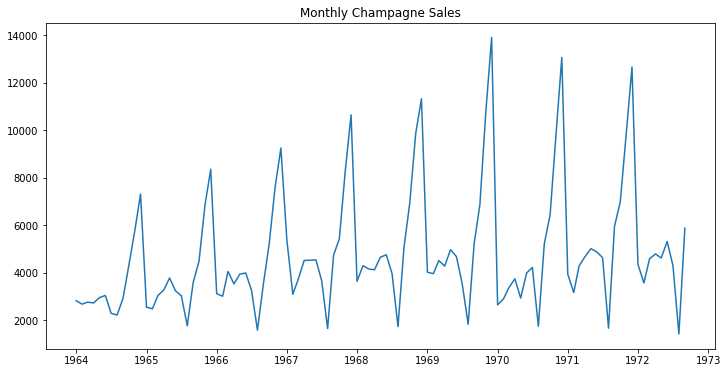

In [9]:
plt.figure(figsize=(12,6))
plt.plot(data)
plt.title('Monthly Champagne Sales');

# Decomposition and Visualization

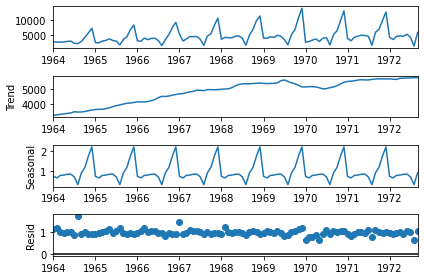

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data, model='multiplicative', extrapolate_trend='freq')
result.plot();

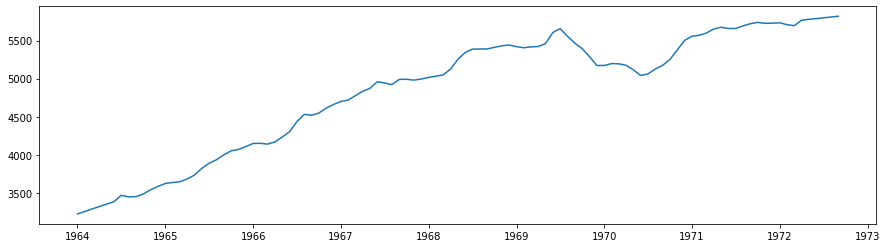

In [11]:
plt.figure(figsize=(15,4))
plt.plot(result.trend);

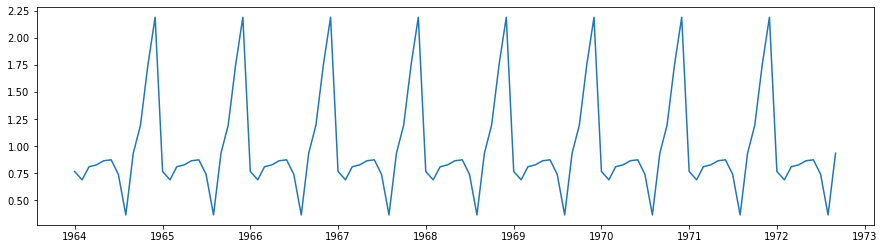

In [12]:
plt.figure(figsize=(15,4))
plt.plot(result.seasonal);

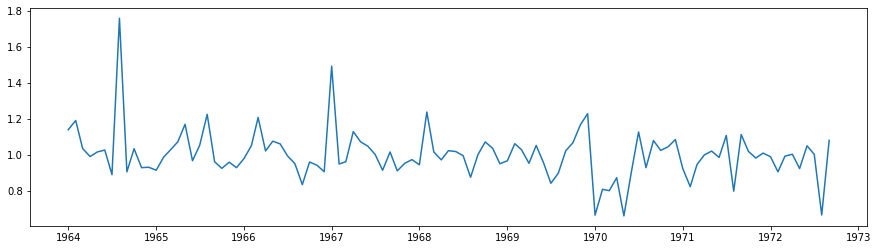

In [13]:
plt.figure(figsize=(15,4))
plt.plot(result.resid);

Nhận xét:
- Với kết quả trên, ta có thể thấy rõ tính seasonal component của data, và cũng có thể thấy xu hướng dữ liệu ở trên được tách riêng.
- Trend có thể lên hoặc xuống và có thể tuyến tính hoặc phi tuyến tính. Cần phải hiểu tập dữ liệu để biết liệu một khoảng thời gian đáng kể đã trôi qua có thể xác định xu hướng thực tế hay chưa.
- Cũng có thể có biến động bất thường (Irregular fluctuation) là những thay đổi đột ngột ngẫu nhiên và không thể đoán trước.

# Create train-test (75%-25%)

In [14]:
train = data.loc[:'1970-07-01']
test = data.loc['1970-08-01':]

In [15]:
test.shape

(26, 1)

In [16]:
train.shape

(79, 1)

# Build the Model

In [17]:
from pmdarima import auto_arima

In [18]:
stepwise_model = auto_arima(data, start_p=1, start_q=1,
                           max_p=5, max_q=5, m=12,
                           start_P=1, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=1486.804, Time=0.52 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1524.662, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1507.071, Time=0.16 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1490.517, Time=0.25 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1486.124, Time=0.39 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1488.819, Time=0.12 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=1486.780, Time=1.05 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=1485.190, Time=0.36 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1486.738, Time=0.91 sec
 ARIMA(1,1,1)(2,1,1)[12]             : AIC=inf, Time=1.79 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1490.003, Time=0.20 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=1487.125, Time=0.47 sec
 ARIMA(1,1,2)(1,1,0)[12]             : AIC=1487.101, Time=0.59 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1516.612, Time=0.06 sec
 ARIMA(0,1,2)(1,1,0)[12]

In [19]:
print(stepwise_model.aic())

1485.1904967087262


Fit model

In [20]:
stepwise_model.fit(train)

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(1, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

# Result

In [21]:
future_forecast_1 = stepwise_model.predict(n_periods=len(test))

In [22]:
future_forecast_1

array([ 1940.04756141,  5225.17911145,  6870.88263014, 10715.67160452,
       13693.32143232,  2740.77227818,  2974.59180774,  3452.30245176,
        3772.80827495,  3083.12924464,  4031.50870416,  4149.02028532,
        1919.1800704 ,  5213.80600633,  6859.86158323, 10711.7147826 ,
       13700.45535041,  2721.3203418 ,  2957.28512752,  3434.44589409,
        3759.00732384,  3059.22323943,  4016.6670661 ,  4143.47801148,
        1909.77736982,  5203.62532547])

In [23]:
future_forecast_1 = pd.DataFrame(future_forecast_1,index=test.index,columns=['Prediction'])
future_forecast_1

,Prediction
Month,
1970-08-01,1940.047561
1970-09-01,5225.179111
1970-10-01,6870.882630
1970-11-01,10715.671605
1970-12-01,13693.321432
1971-01-01,2740.772278
1971-02-01,2974.591808
1971-03-01,3452.302452
1971-04-01,3772.808275


# Visualization

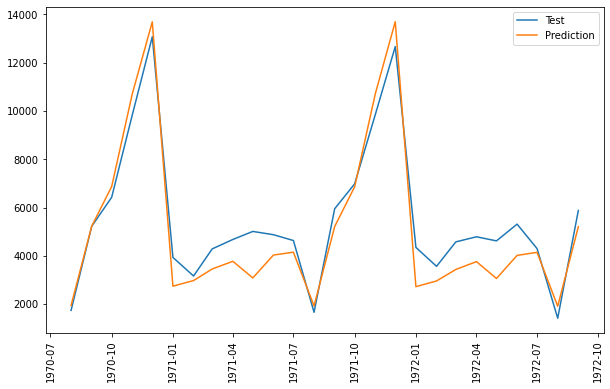

In [24]:
plt.figure(figsize=(10,6))
plt.plot(test, label='Test')
plt.plot(future_forecast_1, label='Prediction')
plt.xticks(rotation='vertical')
plt.legend();

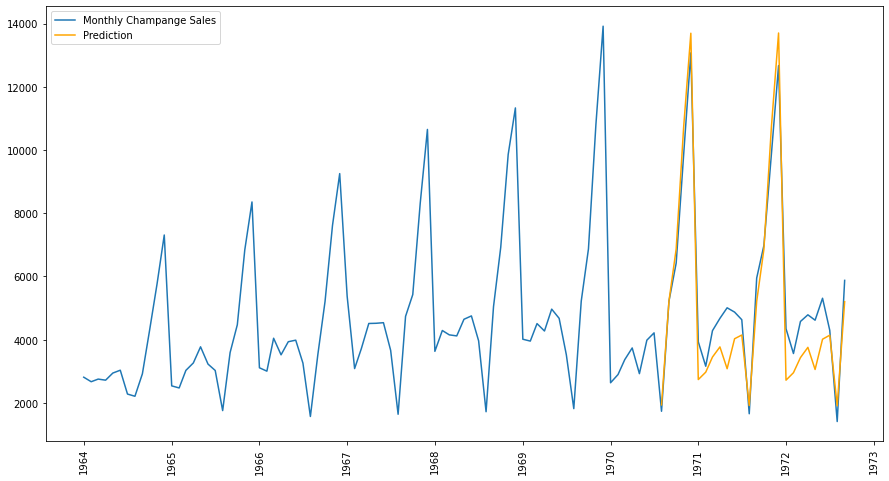

In [25]:
plt.figure(figsize=(15,8))
plt.plot(data, label='Monthly Champange Sales')
plt.plot(future_forecast_1, label='Prediction', color='orange')
plt.xticks(rotation='vertical')
plt.legend();

***Dự đoán số tiền champagne bán được của 9 tháng tiếp theo từ tháng 10-1972 đến tháng 06-1973***

In [26]:
future_forecast_2 = stepwise_model.predict(n_periods=len(test)+9)
future_forecast_2

array([ 1940.04756141,  5225.17911145,  6870.88263014, 10715.67160452,
       13693.32143232,  2740.77227818,  2974.59180774,  3452.30245176,
        3772.80827495,  3083.12924464,  4031.50870416,  4149.02028532,
        1919.1800704 ,  5213.80600633,  6859.86158323, 10711.7147826 ,
       13700.45535041,  2721.3203418 ,  2957.28512752,  3434.44589409,
        3759.00732384,  3059.22323943,  4016.6670661 ,  4143.47801148,
        1909.77736982,  5203.62532547,  6849.65205434, 10700.92640344,
       13688.75818398,  2711.80164914,  2947.59065024,  3424.79647436,
        3749.02558332,  3050.069518  ,  4006.77060059])

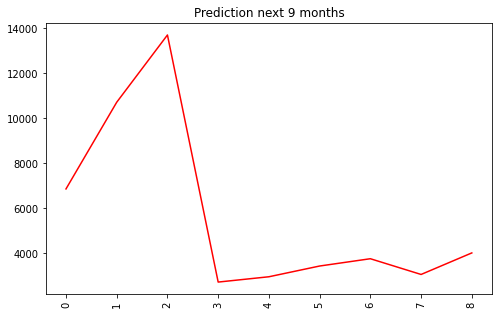

In [27]:
plt.figure(figsize=(8,5))
plt.plot(future_forecast_2[len(test):], color='red')
plt.xticks(rotation='vertical')
plt.title('Prediction next 9 months');

In [28]:
future_forecast_2[len(test):]

array([ 6849.65205434, 10700.92640344, 13688.75818398,  2711.80164914,
        2947.59065024,  3424.79647436,  3749.02558332,  3050.069518  ,
        4006.77060059])

In [29]:
months = pd.date_range('1972-10-01','1973-06-01', 
              freq='MS').strftime("%Y-%m-%d").tolist()          

In [30]:
months

['1972-10-01',
 '1972-11-01',
 '1972-12-01',
 '1973-01-01',
 '1973-02-01',
 '1973-03-01',
 '1973-04-01',
 '1973-05-01',
 '1973-06-01']

Kết quả dự đoán số tiền champagne bán được của 9 tháng tiếp theo từ tháng 10-1972 đến tháng 06-1973:

In [31]:
new_predict = pd.DataFrame({
    'Month' : months,
    'monthly_champange': future_forecast_2[len(test):]}    
    )
new_predict = new_predict.set_index('Month')
new_predict

,monthly_champange
Month,
1972-10-01,6849.652054
1972-11-01,10700.926403
1972-12-01,13688.758184
1973-01-01,2711.801649
1973-02-01,2947.590650
1973-03-01,3424.796474
1973-04-01,3749.025583
1973-05-01,3050.069518
1973-06-01,4006.770601


In [32]:
data_new = pd.concat([data, new_predict])
data_new

,monthly_champange
Month,
1964-01-01 00:00:00,2815.000000
1964-02-01 00:00:00,2672.000000
1964-03-01 00:00:00,2755.000000
1964-04-01 00:00:00,2721.000000
1964-05-01 00:00:00,2946.000000
...,...
1973-02-01,2947.590650
1973-03-01,3424.796474
1973-04-01,3749.025583


In [33]:
data_new.index = pd.to_datetime(data_new.index)
data_new

,monthly_champange
Month,
1964-01-01,2815.000000
1964-02-01,2672.000000
1964-03-01,2755.000000
1964-04-01,2721.000000
1964-05-01,2946.000000
...,...
1973-02-01,2947.590650
1973-03-01,3424.796474
1973-04-01,3749.025583


In [34]:
next9m = data_new.loc['1972-10-01':]

***Trực quan hóa kết quả***

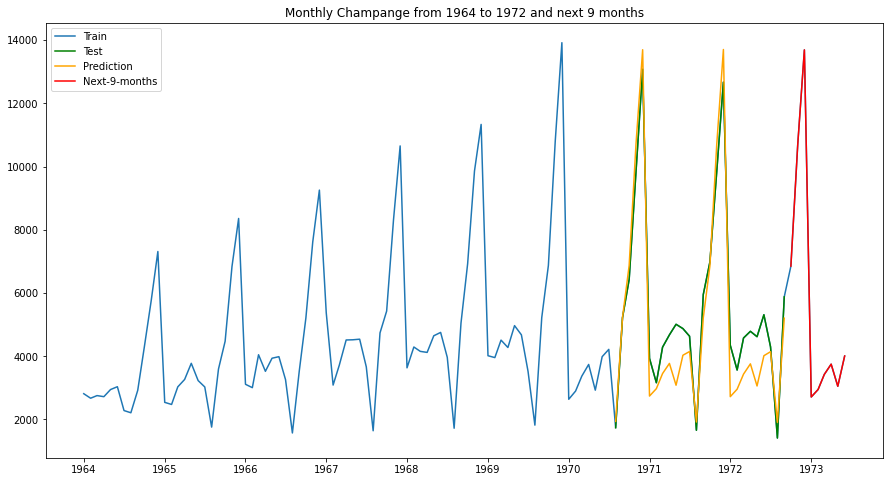

In [35]:
plt.figure(figsize=(15,8))
plt.plot(data_new, label='Train')
plt.plot(test, label='Test', color='green')
plt.plot(future_forecast_1, label='Prediction', color='orange')
plt.plot(next9m, label='Next-9-months', color='red')
plt.title('Monthly Champange from 1964 to 1972 and next 9 months')
plt.legend();